In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

#load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval (x) if pd.notna(x) else x)

In [14]:
#group skills by month
df_DA_TH = df[(df['job_country'] == 'Thailand') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_TH['job_posted_month_no'] = df_DA_TH['job_posted_date'].dt.month
df_DA_TH_skills = df_DA_TH.explode('job_skills')
df_DA_TH_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1590,Data Analyst,Data Analytic Translator,"Bangkok, Thailand",via Jobbkk.com,Full-time,False,Thailand,2023-08-13 13:16:06,True,False,Thailand,None,NaN,NaN,บริษัท โอสถสภา จำกัด (มหาชน),None,None,8
1972,Data Analyst,Data Analyst Internship,Thailand,via LinkedIn,Full-time,False,Thailand,2023-04-15 13:14:39,False,False,Thailand,None,NaN,NaN,Prinsiri,bigquery,"{'cloud': ['bigquery'], 'libraries': ['seleniu...",4
1972,Data Analyst,Data Analyst Internship,Thailand,via LinkedIn,Full-time,False,Thailand,2023-04-15 13:14:39,False,False,Thailand,None,NaN,NaN,Prinsiri,selenium,"{'cloud': ['bigquery'], 'libraries': ['seleniu...",4
2916,Data Analyst,Business and Data Analyst,"Bangkok, Thailand",via Jobbkk.com,Full-time,False,Thailand,2023-12-06 13:21:59,True,False,Thailand,None,NaN,NaN,บริษัท สลีค อีวี จำกัด,None,None,12
3019,Data Analyst,"Data Analyst (BTS ชิดลม, 60k - 70k)","Bangkok, Thailand",via JobThai,Full-time,False,Thailand,2023-04-23 13:13:27,True,False,Thailand,None,NaN,NaN,บริษัท คิว อีลิทเทซ จำกัด,None,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785640,Data Analyst,Data Analyst Lead,Thailand,via Trabajo.org,Full-time,False,Thailand,2023-12-17 06:16:04,False,False,Thailand,None,NaN,NaN,"Siam Piwat Co., Ltd.",sql,"{'analyst_tools': ['excel', 'spreadsheet'], 'l...",12
785640,Data Analyst,Data Analyst Lead,Thailand,via Trabajo.org,Full-time,False,Thailand,2023-12-17 06:16:04,False,False,Thailand,None,NaN,NaN,"Siam Piwat Co., Ltd.",python,"{'analyst_tools': ['excel', 'spreadsheet'], 'l...",12
785640,Data Analyst,Data Analyst Lead,Thailand,via Trabajo.org,Full-time,False,Thailand,2023-12-17 06:16:04,False,False,Thailand,None,NaN,NaN,"Siam Piwat Co., Ltd.",pyspark,"{'analyst_tools': ['excel', 'spreadsheet'], 'l...",12
785640,Data Analyst,Data Analyst Lead,Thailand,via Trabajo.org,Full-time,False,Thailand,2023-12-17 06:16:04,False,False,Thailand,None,NaN,NaN,"Siam Piwat Co., Ltd.",excel,"{'analyst_tools': ['excel', 'spreadsheet'], 'l...",12


In [15]:
#pivot table to count skills per month
df_pivot_table = df_DA_TH_skills.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_pivot_table

job_skills,airflow,alteryx,angular,asp.net,assembly,aws,azure,bigquery,c,c#,...,tableau,tensorflow,trello,unix,vb.net,vba,visio,visual basic,windows,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,3,0,0,1,6,6,2,1,1,...,37,0,0,0,0,5,0,0,0,1
2,1,0,0,0,2,2,3,1,0,1,...,16,0,0,0,0,1,0,0,0,2
3,0,0,0,0,1,3,4,0,0,1,...,20,0,0,0,0,5,0,0,0,1
4,0,1,0,0,0,0,1,1,0,0,...,6,0,0,0,0,3,1,0,0,0
5,0,0,0,0,0,1,0,2,0,0,...,8,0,0,0,0,6,0,0,0,2
6,0,1,0,1,1,1,2,2,1,1,...,14,0,0,0,0,3,0,2,0,1
7,0,0,0,1,0,4,1,2,2,1,...,14,0,0,1,1,3,1,0,0,4
8,0,3,0,0,0,0,2,2,0,1,...,24,1,0,1,0,1,0,0,2,0
9,0,0,0,2,0,5,1,4,3,2,...,17,0,0,3,1,4,0,1,2,8


In [21]:
#sort values to plot
df_pivot_table.loc['Total'] = df_pivot_table.sum()
df_pivot_table = df_pivot_table[df_pivot_table.loc['Total'].sort_values(ascending=False).index]
df_pivot_table = df_pivot_table.drop('Total')
df_pivot_table

job_skills,sql,excel,power bi,python,tableau,r,sas,sql server,powerpoint,flow,...,couchbase,datarobot,react,no-sql,gdpr,github,keras,drupal,jquery,openstack
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,55,41,42,38,37,22,16,11,6,4,...,0,1,0,0,1,0,0,0,0,0
2,23,12,18,19,16,14,12,9,0,1,...,0,0,0,0,0,0,0,0,0,0
3,36,16,25,20,20,15,12,6,5,3,...,0,0,0,0,0,0,0,0,0,0
4,15,12,9,10,6,3,0,3,4,1,...,0,0,0,0,0,0,0,0,0,0
5,18,17,5,6,8,3,0,0,4,3,...,0,0,0,0,0,0,0,0,0,0
6,27,21,18,18,14,5,8,2,6,2,...,0,0,0,0,0,0,0,0,0,0
7,26,27,19,15,14,8,2,2,6,4,...,0,0,0,0,0,0,0,0,0,0
8,39,35,28,30,24,16,8,9,3,1,...,1,0,0,0,0,0,1,0,0,0
9,38,25,28,24,17,12,8,5,6,5,...,0,0,0,0,0,0,0,0,0,0


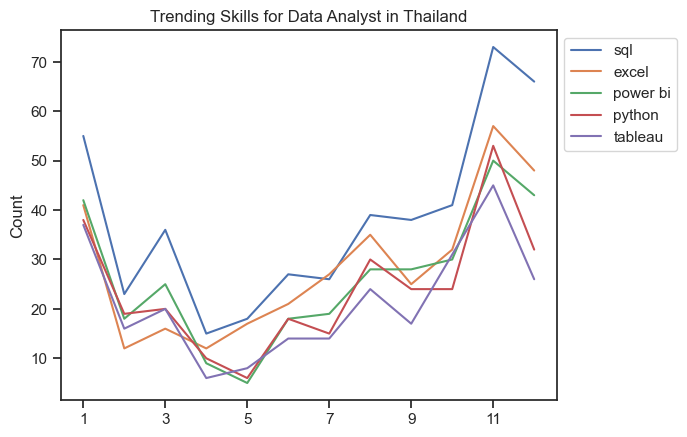

In [32]:
#plot skills trend
df_pivot_table.iloc[:, :5].plot(kind='line')

plt.title('Trending Skills for Data Analyst in Thailand')
plt.xlabel('')
plt.ylabel('Count')

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

In [24]:
#Caluculate Percentage
df_DA_totals = df_DA_TH.groupby('job_posted_month_no').size()
df_DA_totals

job_posted_month_no
1     172
2      74
3      98
4      70
5      70
6      98
7     127
8     109
9     131
10    144
11    218
12    166
dtype: int64

In [25]:
#divide the first 12 rows of df_pivot_table by total jobs
df_DA_TH_perc = df_pivot_table.iloc[:12].div(df_DA_totals/100, axis=0)

df_DA_TH_perc = df_DA_TH_perc.reset_index()
#change month no to month name
df_DA_TH_perc['job_posted_month'] = df_DA_TH_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_TH_perc = df_DA_TH_perc.set_index('job_posted_month')
df_DA_TH_perc = df_DA_TH_perc.drop(columns=['job_posted_month_no'])
df_DA_TH_perc

job_skills,sql,excel,power bi,python,tableau,r,sas,sql server,powerpoint,flow,...,couchbase,datarobot,react,no-sql,gdpr,github,keras,drupal,jquery,openstack
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,31.976744,23.837209,24.418605,22.093023,21.511628,12.790698,9.302326,6.395349,3.488372,2.325581,...,0.000000,0.581395,0.00000,0.000000,0.581395,0.00000,0.000000,0.00000,0.00000,0.000000
Feb,31.081081,16.216216,24.324324,25.675676,21.621622,18.918919,16.216216,12.162162,0.000000,1.351351,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000
Mar,36.734694,16.326531,25.510204,20.408163,20.408163,15.306122,12.244898,6.122449,5.102041,3.061224,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000
Apr,21.428571,17.142857,12.857143,14.285714,8.571429,4.285714,0.000000,4.285714,5.714286,1.428571,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000
May,25.714286,24.285714,7.142857,8.571429,11.428571,4.285714,0.000000,0.000000,5.714286,4.285714,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000
Jun,27.551020,21.428571,18.367347,18.367347,14.285714,5.102041,8.163265,2.040816,6.122449,2.040816,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000
Jul,20.472441,21.259843,14.960630,11.811024,11.023622,6.299213,1.574803,1.574803,4.724409,3.149606,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000
Aug,35.779817,32.110092,25.688073,27.522936,22.018349,14.678899,7.339450,8.256881,2.752294,0.917431,...,0.917431,0.000000,0.00000,0.000000,0.000000,0.00000,0.917431,0.00000,0.00000,0.000000
Sep,29.007634,19.083969,21.374046,18.320611,12.977099,9.160305,6.106870,3.816794,4.580153,3.816794,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000


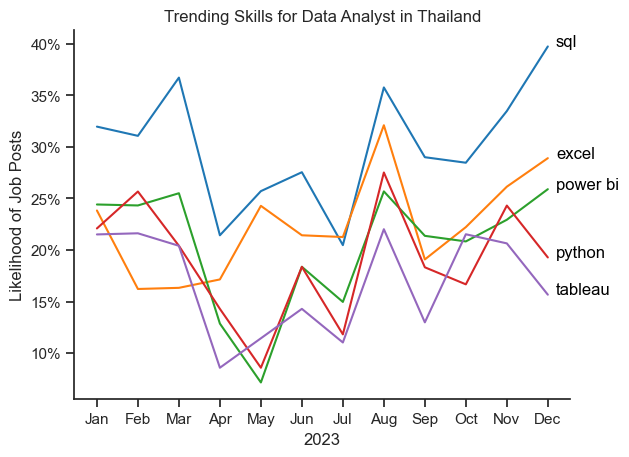

In [ ]:
#plot percentage skills trend
from matplotlib.ticker import PercentFormatter

df_plot =df_DA_TH_perc.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Skills for Data Analysts in Thailand')
plt.ylabel('Likelihood of Job Posts')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

#annotate the plot with the top 5 skills
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()